#雲端連接

In [ ]:
import os
#from tqdm import tqdm
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 雲端執行須執行這行，取得權限
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.getcwd()

'/content'

In [ ]:
# 雲端執行須執行這行，變更環境路徑
os.chdir("/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer")
os.getcwd()

'/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer'

#Kaggle下載


In [ ]:
cd

/root


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ./.kaggle

In [ ]:
cd /root/.kaggle/

/root/.kaggle


In [ ]:
ls

In [ ]:
import shutil
shutil.move("/root/kaggle.json", "/root/.kaggle")

'/root/.kaggle/kaggle.json'

In [ ]:
import shutil
shutil.copy("/root/.kaggle/kaggle.json", "/content")

'/content/kaggle.json'

In [ ]:
! pip install -q kaggle

#loading&解壓縮

In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000


100% 5.20G/5.20G [01:43<00:00, 62.1MB/s]
100% 5.20G/5.20G [01:43<00:00, 53.8MB/s]


In [ ]:
!mkdir '/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/input'

In [ ]:
shutil.copy("/root/.kaggle/skin-cancer-mnist-ham10000.zip", "/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/input")


'/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/input/skin-cancer-mnist-ham10000.zip'

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/input/skin-cancer-mnist-ham10000.zip


解壓縮檔案

In [ ]:
!mkdir /content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset

In [ ]:
import zipfile
def extract_files(source_path, target_path):
    zip_ref = zipfile.ZipFile(source_path,'r')
    zip_ref.extractall(target_path)
    zip_ref.close()
extract_files('/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/input/skin-cancer-mnist-ham10000.zip','/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset')

In [ ]:
cd /content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset

/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset


In [ ]:
ls

ham10000_images_part_1/  HAM10000_images_part_2/  hmnist_28_28_RGB.csv
HAM10000_images_part_1/  HAM10000_metadata.csv    hmnist_8_8_L.csv
ham10000_images_part_2/  hmnist_28_28_L.csv       hmnist_8_8_RGB.csv


#移動檔案

In [ ]:
import shutil
import os

source = r'/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/HAM10000_images_part_2'
destination = r'/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/all_images'
files = os.listdir(source)

for file in files:
    new_path = shutil.move(f"{source}/{file}", destination)
    print(new_path)

串流輸出內容已截斷至最後 5000 行。
/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/all_images/ISIC_0029321.jpg
/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/all_images/ISIC_0029322.jpg
/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/all_images/ISIC_0029323.jpg
/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/all_images/ISIC_0029324.jpg
/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/all_images/ISIC_0029325.jpg
/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/all_images/ISIC_0029326.jpg
/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/all_images/ISIC_0029327.jpg
/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/all_images/ISIC_0029328.jpg
/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/all_images/ISIC_0029329.jpg
/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/all_images/ISIC_0029330.jpg
/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/all_images/ISIC_0029331.jpg
/content/drive/MyDrive

#法1*.CSV*讀取

##Method 1

In [ ]:
data_pathfile = "/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset"
data_list = pd.read_csv(os.path.join(data_pathfile, "HAM10000_metadata.csv"), index_col=False)

In [ ]:
data_list.head(3)

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp

In [ ]:
data_path1 = "/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/image/HAM10000_images_part_1"
data_path2 = "/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/image/HAM10000_images_part_2"

In [ ]:
os.listdir(data_path1)[:5]

In [ ]:
os.listdir(data_path2)[:5]

In [ ]:
import cv2
import os
img1 = cv2.imread(os.path.join(data_path1, data_list.loc[0,"image_id"])+".jpg")
#img2 = cv2.imread(os.path.join(data_path2, data_list.loc[0, "image_id"])+".jpg")

image shape:(450, 600, 3)
data type:uint8
min: 43, max: 255


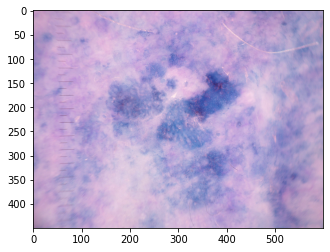

array([[193, 149, 186],
       [194, 152, 187],
       [191, 153, 189],
       ...,
       [169, 156, 194],
       [169, 159, 195],
       [168, 159, 192]], dtype=uint8)

In [ ]:
print(f"image shape:{img1.shape}")
print(f"data type:{img1.dtype}")
print(f"min: {img1.min()}, max: {img1.max()}")
plt.imshow(img1)
plt.show()
img1[1]

In [ ]:
akiec_list = data_list[data_list["dx"]=='akiec']["image_id"].values+".jpg"
bcc_list = data_list[data_list["dx"]=='bcc']["image_id"].values+".jpg"
bkl_list = data_list[data_list["dx"]=='bkl']["image_id"].values+".jpg"
nv_list = data_list[data_list["dx"]=='nv']["image_id"].values+".jpg"
mel_list = data_list[data_list["dx"]=='mel']["image_id"].values+".jpg"
vasc_list = data_list[data_list["dx"]=='vasc']["image_id"].values+".jpg"
df_list = data_list[data_list["dx"]=='df']["image_id"].values+".jpg"
imm=data_list.loc[0, "image_id"]
akiec_list

array(['ISIC_0029417.jpg', 'ISIC_0029915.jpg', 'ISIC_0029360.jpg',
       'ISIC_0026152.jpg', 'ISIC_0029659.jpg', 'ISIC_0026575.jpg',
       'ISIC_0030586.jpg', 'ISIC_0025178.jpg', 'ISIC_0028730.jpg',
       'ISIC_0029041.jpg', 'ISIC_0031040.jpg', 'ISIC_0031929.jpg',
       'ISIC_0032173.jpg', 'ISIC_0033456.jpg', 'ISIC_0030408.jpg',
       'ISIC_0027795.jpg', 'ISIC_0024913.jpg', 'ISIC_0032329.jpg',
       'ISIC_0031198.jpg', 'ISIC_0026872.jpg', 'ISIC_0031191.jpg',
       'ISIC_0025948.jpg', 'ISIC_0030242.jpg', 'ISIC_0031119.jpg',
       'ISIC_0024562.jpg', 'ISIC_0026362.jpg', 'ISIC_0030297.jpg',
       'ISIC_0027084.jpg', 'ISIC_0030714.jpg', 'ISIC_0028158.jpg',
       'ISIC_0028231.jpg', 'ISIC_0026411.jpg', 'ISIC_0029634.jpg',
       'ISIC_0031918.jpg', 'ISIC_0030803.jpg', 'ISIC_0025831.jpg',
       'ISIC_0027231.jpg', 'ISIC_0027719.jpg', 'ISIC_0024843.jpg',
       'ISIC_0028381.jpg', 'ISIC_0030602.jpg', 'ISIC_0031874.jpg',
       'ISIC_0032437.jpg', 'ISIC_0025069.jpg', 'ISIC_0027700.j

In [ ]:
import numpy as np
akiec_num = np.array(akiec_list)
bcc_num = np.array(bcc_list)
bkl_num = np.array(bkl_list)
nv_num = np.array(nv_list)
mel_num = np.array(mel_list)
vasc_num = np.array(vasc_list)
df_num = np.array(df_list)

print("akiec:",akiec_num.size) 
print("bcc:",bcc_num.size) 
print("bkl:",bkl_num.size) 
print("nv:",nv_num.size) 
print("mel:",mel_num.size) 
print("vasc:",vasc_num.size) 
print("df:",df_num.size)

akiec: 327
bcc: 514
bkl: 1099
nv: 6705
mel: 1113
vasc: 142
df: 115


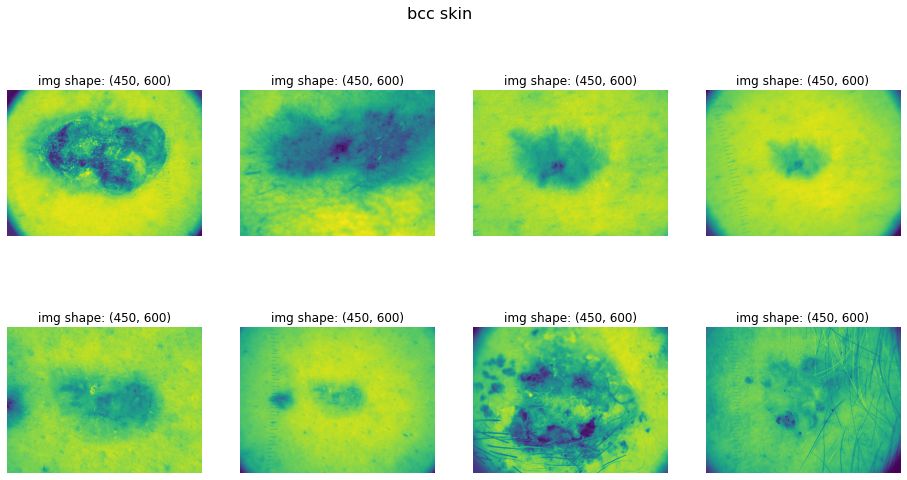

In [ ]:
plt.figure(figsize=(16, 8))

for i in range(8):
    plt.subplot(2, 4, i+1)
    img3 = cv2.imread(os.path.join(data_path1, bcc_list[i]), 0)
    #img3 = cv2.imread((os.path.join(data_path2, akiec_list[i])+".jpg"), 0)
#print(f"image shape:{img3.shape}")

    plt.imshow(img3)
    plt.axis("off")
    plt.title(f"img shape: {img3.shape}")
plt.suptitle(f"bcc skin", fontsize=16)
plt.show()

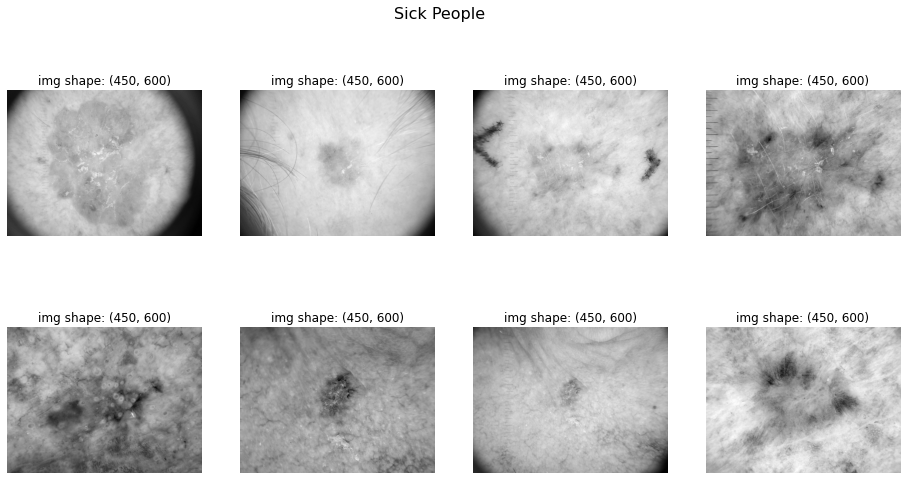

In [ ]:
plt.figure(figsize=(16, 8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    img4 = cv2.imread(os.path.join(data_path1, akiec_list[i]), 0)
    plt.imshow(img4, cmap="gray")
    plt.axis("off")
    plt.title(f"img shape: {img4.shape}")
plt.suptitle(f"Sick People", fontsize=16)
plt.show()

##Method2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image

In [ ]:
data_sum = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/HAM10000_metadata.csv')


In [ ]:
data_sum[:3]

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp

法1:指令尋找圖片(找不到就去另一個資料找)

In [ ]:
cd /content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/


/content


In [ ]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('dataset/', '*', '*.jpg'))}

In [ ]:
image_path

{'ISIC_0028306': 'dataset/all_images/ISIC_0028306.jpg',
 'ISIC_0028307': 'dataset/all_images/ISIC_0028307.jpg',
 'ISIC_0028308': 'dataset/all_images/ISIC_0028308.jpg',
 'ISIC_0028309': 'dataset/all_images/ISIC_0028309.jpg',
 'ISIC_0028310': 'dataset/all_images/ISIC_0028310.jpg',
 'ISIC_0028311': 'dataset/all_images/ISIC_0028311.jpg',
 'ISIC_0028312': 'dataset/all_images/ISIC_0028312.jpg',
 'ISIC_0028313': 'dataset/all_images/ISIC_0028313.jpg',
 'ISIC_0028314': 'dataset/all_images/ISIC_0028314.jpg',
 'ISIC_0028315': 'dataset/all_images/ISIC_0028315.jpg',
 'ISIC_0028316': 'dataset/all_images/ISIC_0028316.jpg',
 'ISIC_0028317': 'dataset/all_images/ISIC_0028317.jpg',
 'ISIC_0028318': 'dataset/all_images/ISIC_0028318.jpg',
 'ISIC_0028319': 'dataset/all_images/ISIC_0028319.jpg',
 'ISIC_0028320': 'dataset/all_images/ISIC_0028320.jpg',
 'ISIC_0028321': 'dataset/all_images/ISIC_0028321.jpg',
 'ISIC_0028322': 'dataset/all_images/ISIC_0028322.jpg',
 'ISIC_0028323': 'dataset/all_images/ISIC_002832

In [ ]:
#Define the path and add as a new column
data_sum['path'] = data_sum['image_id'].map(image_path.get)

In [ ]:
data_sum[:5]

lesion_id  ...                                             path
0  HAM_0000118  ...  dataset/ham10000_images_part_1/ISIC_0027419.jpg
1  HAM_0000118  ...  dataset/ham10000_images_part_1/ISIC_0025030.jpg
2  HAM_0002730  ...  dataset/ham10000_images_part_1/ISIC_0026769.jpg
3  HAM_0002730  ...  dataset/ham10000_images_part_1/ISIC_0025661.jpg
4  HAM_0001466  ...  dataset/ham10000_images_part_2/ISIC_0031633.jpg

[5 rows x 8 columns]

用datapath來讀取圖片，並且resize圖片，最後變成numpy array



In [ ]:
data_sum['image'] = data_sum['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))


KeyError: ignored

In [ ]:
data_sum['image']


In [ ]:
print(data_sum['dx'].value_counts())
n_samples = 5   # number of samples for plotting

In [ ]:
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         data_sum.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')


法2.直接複製第二個資料夾內的圖片到第一個資料夾



In [ ]:
!mkdir /content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/reorganized


mkdir: cannot create directory ‘/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/reorganized’: File exists


In [ ]:
# Dump all images into a folder and specify the path:
data_dir = os.getcwd() + "/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/all_images/"

# Path to destination directory where we want subfolders
dest_dir = os.getcwd() + "/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/reorganized/"

# Read the csv file containing image names and corresponding labels
data_sum2 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/HAM10000_metadata.csv')
print(data_sum['dx'].value_counts())

label=data_sum2['dx'].unique().tolist()  #Extract labels into a list
label_images = []

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


In [ ]:
dest_dir


'/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/reorganized/'

In [ ]:
import shutil
# Copy images to new folders
for i in label:
    os.mkdir(dest_dir + str(i) + "/")
    sample = data_sum2[data_sum2['dx'] == i]['image_id']
    label_images.extend(sample)
    for id in label_images:
        shutil.copyfile((data_dir + "/"+ id +".jpg"), (dest_dir + i + "/"+id+".jpg"))
    label_images=[]

#法2 keras_imagegenerator

In [ ]:
cd /content/drive/MyDrive/Colab_Notebooks/Skin_Cancer


/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer


Found 10015 images belonging to 7 classes.


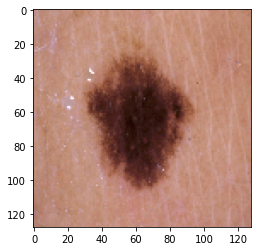

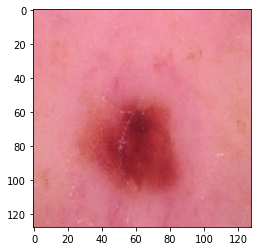

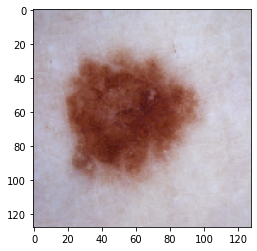

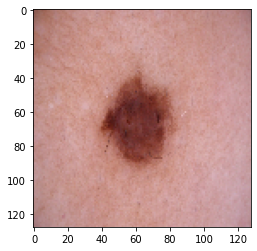

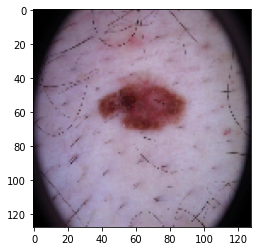

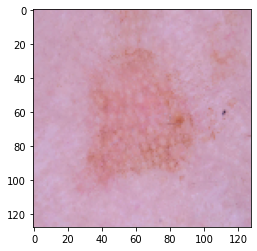

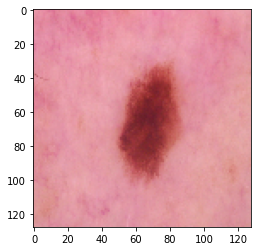

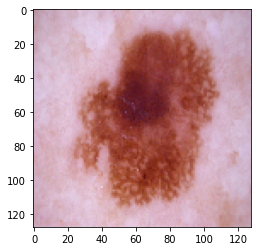

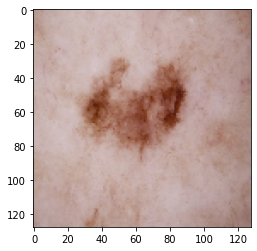

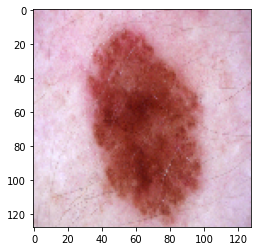

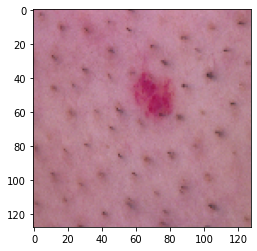

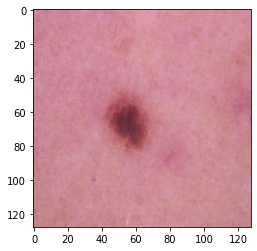

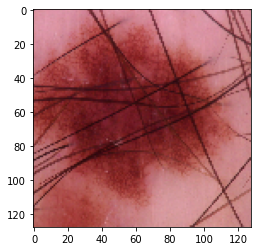

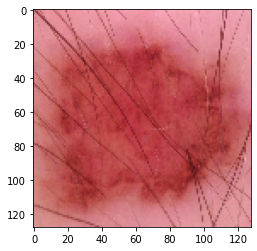

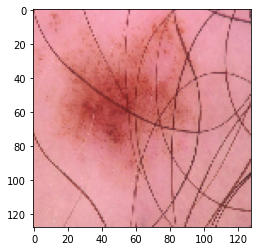

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os
from matplotlib import pyplot as plt

#Define datagen. Here we can define any transformations we want to apply to images
datagen = ImageDataGenerator()

# define training directory that contains subfolders
train_dir = os.getcwd() + "/dataset/reorganized/"
#USe flow_from_directory
train_data_keras = datagen.flow_from_directory(directory=train_dir,
                                   class_mode='categorical',
                                   batch_size=16,       #16 images at a time
                                   target_size=(128, 128))    #Resize images

#We can check images for a single batch.
x, y = next(train_data_keras)
#View each image
for i in range (0,15):
    image = x[i].astype(int)
    plt.imshow(image)
    plt.show()

#資料前處理


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

np.random.seed(42)
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder
#!pip install autokeras

skin_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/HAM10000_metadata.csv')
SIZE=64
skin_df

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

分析數據



Label encoding : 把每個類別 mapping 到某個整數，不會增加新欄位

One hot encoding : 為每個類別新增一個欄位，用 0/1 表示是否

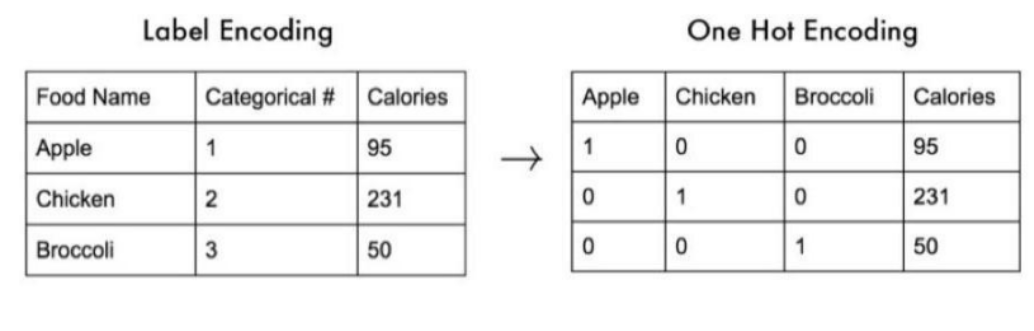

In [ ]:
# label encoding to numeric values from text
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))
 
skin_df['label'] = le.transform(skin_df["dx"]) 
print(skin_df.sample(10))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
        lesion_id      image_id   dx  ...     sex     localization label
1617  HAM_0007180  ISIC_0033272  mel  ...    male             face     4
8128  HAM_0007195  ISIC_0031923   nv  ...  female  lower extremity     5
2168  HAM_0001835  ISIC_0026652  mel  ...    male             back     4
1090  HAM_0000465  ISIC_0030583  bkl  ...  female            trunk     2
7754  HAM_0001720  ISIC_0034010   nv  ...    male          abdomen     5
8071  HAM_0006333  ISIC_0024424   nv  ...    male            trunk     5
7423  HAM_0004548  ISIC_0032832   nv  ...  female  upper extremity     5
8984  HAM_0006526  ISIC_0026671   nv  ...    male  lower extremity     5
2310  HAM_0003102  ISIC_0032389  mel  ...    male             face     4
7256  HAM_0004260  ISIC_0025525   nv  ...    male             back     5

[10 rows x 8 columns]


In [ ]:
skin_df[4000:4009]


lesion_id      image_id  dx  ...     sex     localization label
4000  HAM_0005179  ISIC_0024957  nv  ...    male  lower extremity     5
4001  HAM_0001923  ISIC_0029219  nv  ...    male  lower extremity     5
4002  HAM_0002181  ISIC_0030972  nv  ...    male  lower extremity     5
4003  HAM_0000780  ISIC_0027453  nv  ...    male  lower extremity     5
4004  HAM_0002659  ISIC_0026448  nv  ...  female            trunk     5
4005  HAM_0004796  ISIC_0032143  nv  ...  female             back     5
4006  HAM_0000213  ISIC_0029167  nv  ...  female  upper extremity     5
4007  HAM_0001798  ISIC_0030141  nv  ...    male             back     5
4008  HAM_0007153  ISIC_0027813  nv  ...    male             back     5

[9 rows x 8 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


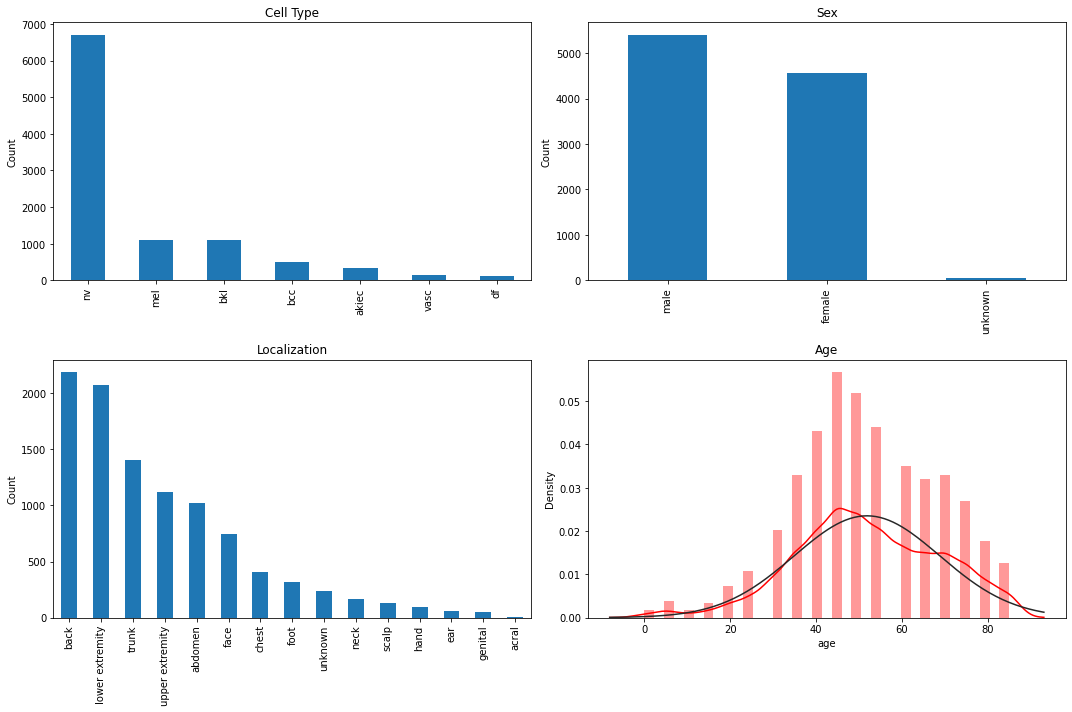

In [ ]:
fig = plt.figure(figsize=(15,10))  #圖片大小

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1) #柱狀圖
ax1.set_ylabel('Count',size=10)
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=10)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar',ax=ax3)
ax3.set_ylabel('Count',size=10)
ax3.set_title('Localization')


ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()

In [ ]:
# Distribution of data into various classes 
from sklearn.utils import resample
print(skin_df['label'].value_counts())

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64


In [ ]:
#Balance data.
# Many ways to balance data... you can also try assigning weights during model.fit
#Separate each classes, resample, and combine back into single dataframe

df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

n_samples=700 
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42,stratify=df_0) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42,stratify=df_1) 
df_2_balanced = resample(df_2, replace=False, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42,stratify=df_3)
df_4_balanced = resample(df_4, replace=False, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=False, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42,stratify=df_6)

skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced, 
                              df_2_balanced, df_3_balanced, 
                              df_4_balanced, df_5_balanced, df_6_balanced])

In [ ]:
#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID
print(skin_df_balanced['label'].value_counts())


image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/reorganized', '*', '*.jpg'))}
#Define the path and add as a new column
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)
#Use the path to read images.
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))


n_samples = 5

3    700
6    700
2    700
5    700
1    700
4    700
0    700
Name: label, dtype: int64


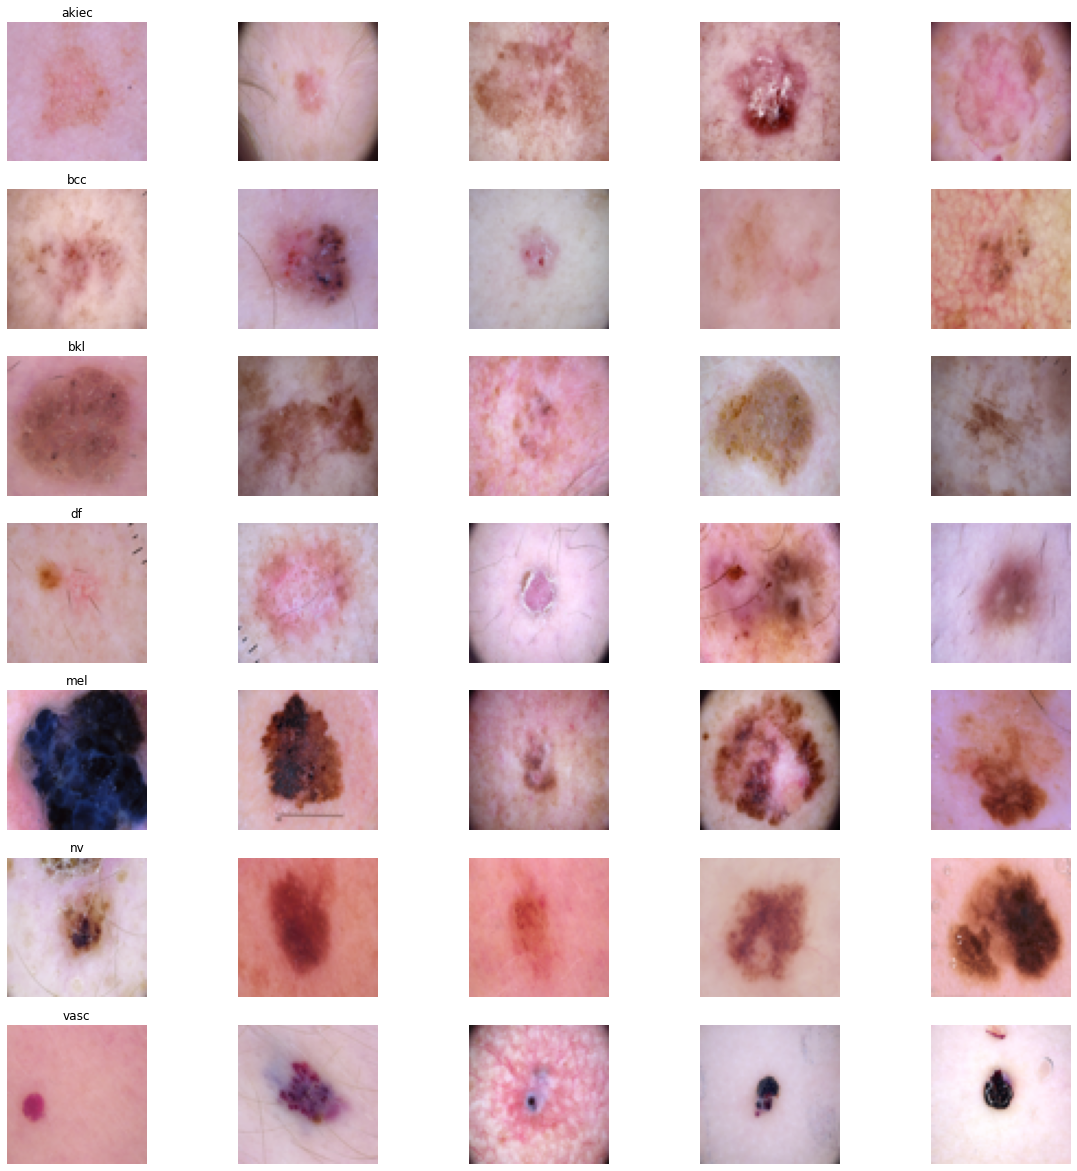

In [ ]:
# Plot
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [ ]:
#Convert dataframe column of images into numpy array
X = np.asarray(skin_df_balanced['image'].tolist())
X_nol = X/255. # Scale values to 0-1. You can also used standardscaler or other scaling methods.
Y=skin_df_balanced['label'] #Assign label values to Y
Y_cat = to_categorical(Y, num_classes=7) #Convert to categorical as this is a multiclass classification problem

In [ ]:
#Split to training and testing. Get a very small dataset for training as we will be 
# fitting it to many potential models. 
x_train,zx,y_train,zy = train_test_split(X_nol, Y_cat, test_size=0.2, random_state=42)

#Further split data into smaller size to get a small test dataset. 
x_valid,x_test,y_valid,y_test = train_test_split(zx, zy, test_size=0.5, random_state=42)

使用autokeras 會跑東種模型選擇最佳的權重值(需要大量的memory)

In [ ]:
#Define classifier for autokeras. Here we check 25 different models, each model 25 epochs
###clf = ak.ImageClassifier(max_trials=25) #MaxTrials - max. number of keras models to try
#history=clf.fit(x_train, y_train, epochs=25,verbose=1, validation_data=(x_valid, y_valid))

#建造model

In [ ]:
class_weight={0:1. , 1:1. , 2:1. , 3:1. , 4:1. , 5:1. , 6:1.}
class_weight

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0}

In [ ]:
SIZE=64
import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D

modelq = Sequential()
modelq.add(Conv2D(32, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
modelq.add(MaxPool2D(pool_size=(2, 2)))  
modelq.add(BatchNormalization())
#modelq.add(Dropout(0.3))

modelq.add(Conv2D(64, (3, 3),activation='relu'))
#modelq.add(Conv2D(64, (3, 3),activation='relu'))

#
modelq.add(MaxPool2D(pool_size=(2, 2)))  
modelq.add(BatchNormalization())
#modelq.add(Dropout(0.3))

#modelq.add(Conv2D(64, (3, 3),activation='relu'))
#modelq.add(Conv2D(64, (3, 3),activation='relu'))


modelq.add(MaxPool2D(pool_size=(2, 2)))  
modelq.add(BatchNormalization())
#modelq.add(Dropout(0.3))
#modelq.add(GlobalAveragePooling2D())
#model.add(Flatten())
#modelq.add(Dense(256, activation='relu'))
#modelq.add(Conv2D(128, (3, 3),activation='relu'))
#modelq.add(Conv2D(128, (3, 3),activation='relu'))
#modelq.add(MaxPool2D(pool_size=(2, 2)))  
modelq.add(Flatten())
#modelq.add(Dropout(0.5))
modelq.add(Dense(128, activation='relu'))
modelq.add(BatchNormalization())
modelq.add(Dropout(0.2))
#modelq.add(Dense(64, activation='relu'))
#modelq.add(BatchNormalization())
#modelq.add(Dropout(0.5))
modelq.add(Dense(32, activation='relu'))
modelq.add(BatchNormalization())
modelq.add(Dense(16, activation='relu'))
modelq.add(BatchNormalization())
modelq.add(Dense(7, activation='softmax'))
modelq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                        

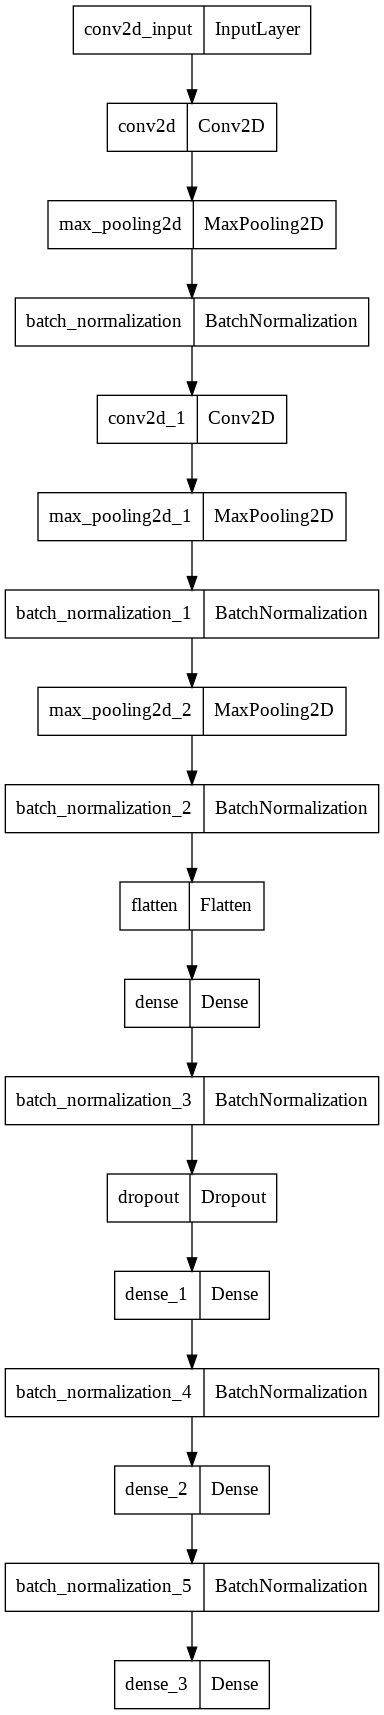

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(modelq, to_file='model_1.png')


In [ ]:
#Define the model.
#I've used autokeras to find out the best model for this problem.
#You can also load pretrained networks such as mobilenet or VGG16
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
import tensorflow as tf
np.random.seed(42)
from sklearn.metrics import confusion_matrix

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder

num_classes = 7

#model = Sequential()
#model.add(Conv2D(128, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
#model.add(BatchNormalization())
#model.add(MaxPool2D(pool_size=(2, 2)))  
#model.add(Dropout(0.3))
#
#model.add(Conv2D(64, (3, 3),activation='relu'))
##model.add(BatchNormalization())
#model.add(MaxPool2D(pool_size=(2, 2)))  
#model.add(Dropout(0.3))
#
#model.add(Conv2D(32, (3, 3),activation='relu'))
##model.add(BatchNormalization())
#model.add(MaxPool2D(pool_size=(2, 2)))  
#model.add(Dropout(0.3))
##model.add(Flatten())
#model.add(Dense(64))
#model.add(Dense(32))
#model.add(Dense(7, activation='softmax'))
#model.summary()
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
modelq.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])


# Train
#You can also use generator to use augmentation during training.

batch_size = 16
epochs = 25
class_weight={0:5. , 1:7. , 2:40. , 3:3. , 4:15. , 5:10. , 6:2.}
history = modelq.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size =batch_size,
    validation_data=(x_test, y_test),
    class_weight=class_weight,
    verbose=2)

score = modelq.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

Epoch 1/25
245/245 - 5s - loss: 0.8088 - acc: 0.7094 - val_loss: 0.8409 - val_acc: 0.6980 - 5s/epoch - 21ms/step
Epoch 2/25
245/245 - 3s - loss: 0.6992 - acc: 0.7429 - val_loss: 0.6491 - val_acc: 0.7673 - 3s/epoch - 13ms/step
Epoch 3/25
245/245 - 4s - loss: 0.6404 - acc: 0.7679 - val_loss: 0.6855 - val_acc: 0.7347 - 4s/epoch - 15ms/step
Epoch 4/25
245/245 - 4s - loss: 0.6188 - acc: 0.7753 - val_loss: 0.6580 - val_acc: 0.7816 - 4s/epoch - 15ms/step
Epoch 5/25
245/245 - 3s - loss: 0.5722 - acc: 0.7941 - val_loss: 0.6747 - val_acc: 0.7633 - 3s/epoch - 13ms/step
Epoch 6/25
245/245 - 3s - loss: 0.5354 - acc: 0.8115 - val_loss: 0.6434 - val_acc: 0.7714 - 3s/epoch - 14ms/step
Epoch 7/25
245/245 - 3s - loss: 0.5085 - acc: 0.8176 - val_loss: 0.6224 - val_acc: 0.7694 - 3s/epoch - 14ms/step
Epoch 8/25
245/245 - 3s - loss: 0.4876 - acc: 0.8224 - val_loss: 0.6143 - val_acc: 0.7735 - 3s/epoch - 14ms/step
Epoch 9/25
245/245 - 3s - loss: 0.4667 - acc: 0.8349 - val_loss: 0.6453 - val_acc: 0.7816 - 3s/e

In [ ]:
cd /content/drive/MyDrive/Colab_Notebooks/Skin_Cancer

/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer


In [ ]:
#保存模型權重
modelq.save_weights("model.h5")

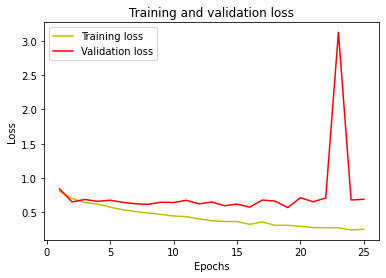

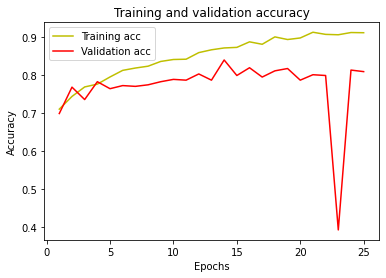

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Prediction on test data
y_pred = modelq.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1)

In [ ]:
loss,score=modelq.evaluate(x_test,y_test)


16/16 [==============================] - 0s 7ms/step - loss: 0.6882 - acc: 0.8082


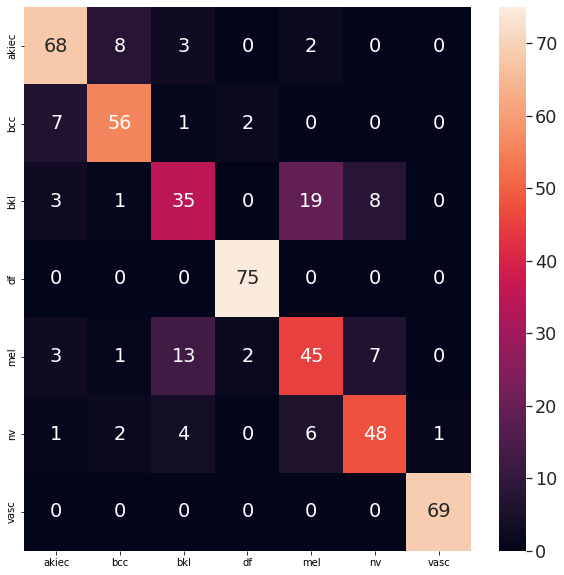

In [ ]:
#Print confusion matrix
import pandas as pd


target_names=['akiec','bcc','bkl','df','mel','nv','vasc']
cm = confusion_matrix(y_true, y_pred_classes)
conf_m = pd.DataFrame(cm,
            index = target_names,
            columns = target_names)
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.6)
#sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)
sns.heatmap(conf_m,annot=True,fmt='g')

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred_classes,target_names=target_names)
print(report)

              precision    recall  f1-score   support

       akiec       0.83      0.84      0.83        81
         bcc       0.82      0.85      0.84        66
         bkl       0.62      0.53      0.57        66
          df       0.95      1.00      0.97        75
         mel       0.62      0.63      0.63        71
          nv       0.76      0.77      0.77        62
        vasc       0.99      1.00      0.99        69

    accuracy                           0.81       490
   macro avg       0.80      0.80      0.80       490
weighted avg       0.80      0.81      0.81       490



Text(0, 0.5, 'Fraction of incorrect predictions')

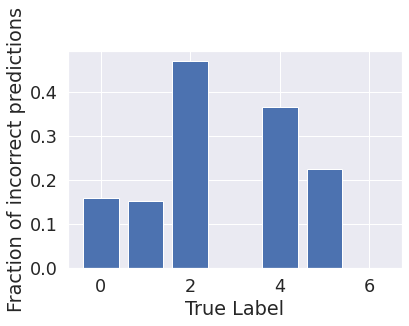

In [ ]:
#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
!pip install tensorflow==2.6.0
!pip install keras~=2.6.0

In [ ]:
cd /content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/

/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset


In [ ]:
def grad_cam(input_model, image, img_shape, category_index, layer_name):
    grad_model = Model(input_model.inputs, [input_model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(np.array([img]))
        loss = predictions[:, category_index]

    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]
    grads_val = grads.numpy()

    weights = np.mean(grads_val, axis = (0, 1))
    cam = np.dot(output, weights)

    cam = cv2.resize(cam, img_shape)
    cam = np.maximum(cam, 0)
    heatmap = cam / np.max(cam)

    cam = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    
    return np.uint8(cam), heatmap

In [ ]:
data_path="/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset"
cam_path="/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/grad_cam"
if not os.path.exists(cam_path):
  os.makedirs(cam_path)

In [ ]:
def load_image(path, img_shape):
    img = image.load_img(path, target_size=img_shape)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [ ]:
each1="/content/drive/MyDrive/Colab_Notebooks/Skin_Cancer/dataset/ISIC_0025772.jpg"
preprocessed_input = load_image(os.path.join(data_path, each1), img_shape)
    
img = cv2.imread(os.path.join(data_path, each1))
img = cv2.resize(img, img_shape)
    
predictions = model.predict(preprocessed_input)
predicted_class = np.argmax(predictions)
    
cam, heatmap = grad_cam(model, preprocessed_input, img_shape, predicted_class, layer_name)
overcam = cv2.addWeighted(img, 0.8, cam, 0.3, 0)
    
cv2.imwrite(os.path.join(cam_path, each1), overcam)

plt.figure(figsize=(5, 5))
plt.imshow(overcam[:,:,::-1])
plt.axis("off")
plt.show()      
# K.clear_session() ) 

NameError: ignored